In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score

In [21]:
# Read the data from the csv files
df = pd.read_csv('../Video_games_esrb_rating.csv')

# Print the first 5 rows of the dataframe.
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [22]:
# Rename the strong_janguage column to strong_language to fix typo
df = df.rename(columns={"strong_janguage": "strong_language"})

In [23]:
# Check if all the titles are unique
df['title'].is_unique

True

In [24]:
# Get the unique values of the esrb_rating column
ratings = df['esrb_rating'].unique()
ratings

array(['E', 'ET', 'M', 'T'], dtype=object)

In [25]:
# Drop the unnecessary columns 
df.drop(['title', 'console'], inplace=True, axis=1)

In [26]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis = 1)

In [27]:
# Split the data into training and testing sets
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

In [28]:
# Scale the data
scaler = StandardScaler()

# Scale both X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Create a KNN classifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
# Predict the classes of the test data
y_pred = classifier.predict(X_test)

In [31]:
# Print the accuracy of the classifier
acc =  classifier.score(X_test, y_test)
print(acc)

0.8059071729957806


              precision    recall  f1-score   support

           E       0.89      0.98      0.93       119
          ET       0.65      0.70      0.67        82
           M       0.81      0.83      0.82        94
           T       0.82      0.73      0.77       179

    accuracy                           0.81       474
   macro avg       0.79      0.81      0.80       474
weighted avg       0.81      0.81      0.80       474



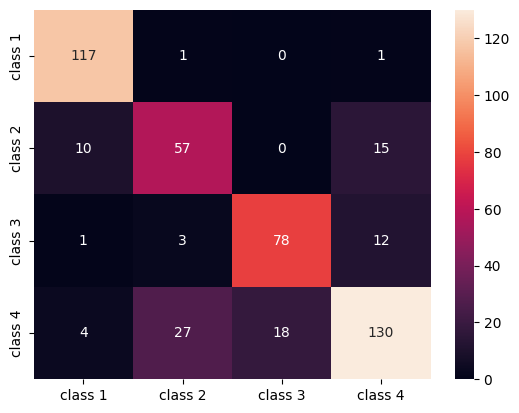

In [32]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3', 'class 4']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, y_pred))

In [33]:
f1s = []

# Calculating f1 score for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 4 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

Text(0, 0.5, 'F1 Score')

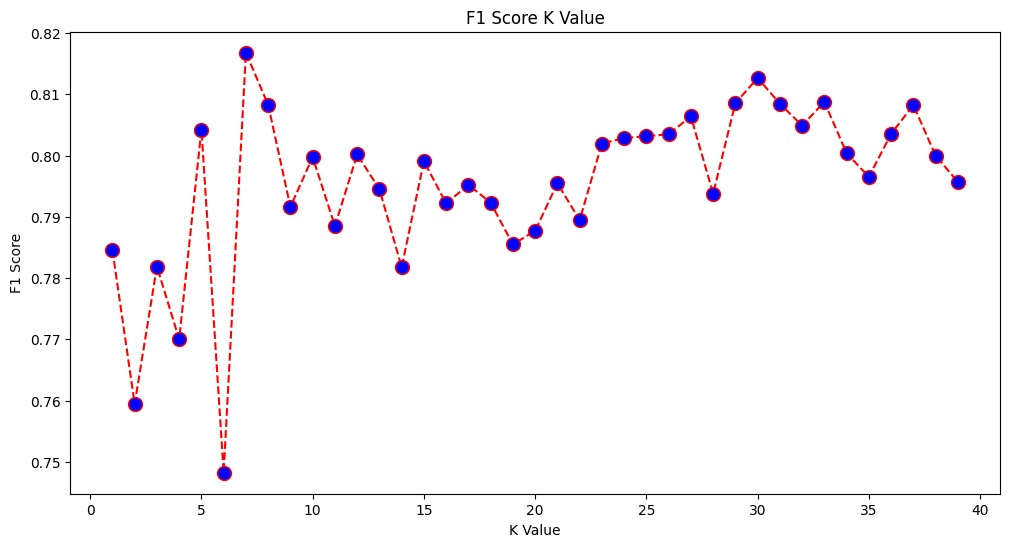

In [34]:
# Plotting the f1 score for each K value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')

In [35]:
# Plotting the f1 score for each K value
t = pd.DataFrame(f1s)

In [36]:
# Create a KNN classifier with K=6
classifier15 = KNeighborsClassifier(n_neighbors=6)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           E       0.86      0.99      0.92       119
          ET       0.65      0.70      0.67        82
           M       0.67      0.85      0.75        94
           T       0.80      0.58      0.67       179

    accuracy                           0.76       474
   macro avg       0.74      0.78      0.75       474
weighted avg       0.76      0.76      0.75       474

